In [1]:
import sys
import matplotlib.pyplot as plt
#sys.path.insert(0, 'C:\\Users\\gasto\\OneDrive - UGent\\Documentos\\PhD\\Pedophysics_code') 
sys.path.insert(0, 'C:\\Users\\gmendoza\\OneDrive - UGent\\Documentos\\PhD\\Pedophysics_code')
import numpy as np

from pedophysics.simulate import Soil
from pedophysics import predict
from pedophysics.pedophysical_models.bulk_ec import Fu, Rhoades, LongmireSmithEC
from pedophysics.pedophysical_models.bulk_perm import Hilhorst
from pedophysics.pedotransfer_functions import Schjonnen

import pandas as pd
pd.set_option('max_colwidth', None)


In [2]:
sample7c = Soil(water =                        [0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07, np.nan, np.nan], 
                            bulk_perm =        [6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5,  8.5,    8.5   ], 
                            frequency_perm =   [50e6, 50e6, 50e6, 200e6,  200e6,  200e6,  50e6,   50e6, 50e6,   200e6 ],
                            frequency_cond =   [50e2, 50e2, 50e2, 200e1,  200e3,  200e4,  50e1,   50e3, 50e3,   20    ],
                            bulk_density=1.7,
                            texture = 'Sand',
                            solid_perm = 5,
                            water_ec = 0.05)

In [3]:
print("################## Example Odarslov ####################")     
# Hamed et al., 2003

sample_O = Soil( bulk_ec=[0.02, 0.03, 0.04, 0.05, 0.06], 
                bulk_perm=[11.5, 14.8, 17, 20, 22.7],
                clay=5,
                bulk_density=1.48,
                instrument='TDR')

predict.WaterEC(sample_O)
print(sample_O.df.water_ec)
print(sample_O.info.water_ec)

################## Example Odarslov ####################
0    0.289855
1    0.289855
2    0.289855
3    0.289855
4    0.289855
Name: water_ec, dtype: float64
0    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
1    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
2    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
3    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
4    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
Name: water_ec, dtype: object


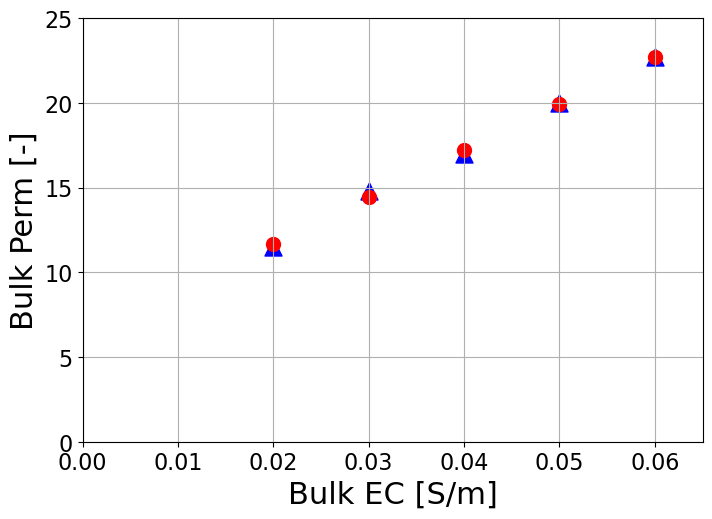

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample_O.df.bulk_ec, sample_O.df.bulk_perm, marker = "^", color='blue', alpha=1, s=ss)
ax.scatter(sample_O.df.bulk_ec, 
           Hilhorst(sample_O.df.bulk_ec, sample_O.df.water_ec, sample_O.df.water_perm, sample_O.df.offset_perm), 
           color='red', alpha=1, s=100)

fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_ylim(0, 25)
ax.set_xlim(0, 65e-3)
ax.grid(True)
ax.set_ylabel('Bulk Perm [-]', fontsize = 22)
ax.set_xlabel('Bulk EC [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('sample_O')
plt.show()

ax.scatter(sample_O.df.bulk_ec, sample_O.df.bulk_perm, marker = "^", color='blue', alpha=1, s=ss)
ax.scatter(sample_O.df.bulk_ec, 
           Hilhorst(sample_O.df.bulk_ec, sample_O.df.water_ec, sample_O.df.water_perm, sample_O.df.offset_perm), 
           color='red', alpha=1, s=100)

In [5]:
#print("################## Example DR_S ####################")     
                         #   0     1    2     3       4       5       6       7
sampleDR_S = Soil(bulk_ec =  [0, 8*10**-4, 3*10**-3, 6.5*10**-3, 1.3*10**-2, 1.8*10**-2],
                water = [0, 0.072,      0.144,    0.22,     0.29,       0.36      ],
                clay=5,
                bulk_density=1.48,
                instrument = 'TDR')

predict.Salinity(sampleDR_S)
print(sampleDR_S.df.salinity)
print(sampleDR_S.info.salinity)

print(sampleDR_S.df.water_ec)
print(sampleDR_S.info.water_ec)

0    0.00533
1    0.00533
2    0.00533
3    0.00533
4    0.00533
5    0.00533
Name: salinity, dtype: float64
0    Calculated using SenGood function in predict.Salinity
1    Calculated using SenGood function in predict.Salinity
2    Calculated using SenGood function in predict.Salinity
3    Calculated using SenGood function in predict.Salinity
4    Calculated using SenGood function in predict.Salinity
5    Calculated using SenGood function in predict.Salinity
Name: salinity, dtype: object
0    0.063443
1    0.063443
2    0.063443
3    0.063443
4    0.063443
5    0.063443
Name: water_ec, dtype: float64
0    nan--> Calculated by fitting (R2 = 0.995) Rhoades function in predict.water_ec.fitting_rhoades
1    nan--> Calculated by fitting (R2 = 0.995) Rhoades function in predict.water_ec.fitting_rhoades
2    nan--> Calculated by fitting (R2 = 0.995) Rhoades function in predict.water_ec.fitting_rhoades
3    nan--> Calculated by fitting (R2 = 0.995) Rhoades function in predict.water_ec.fitting_

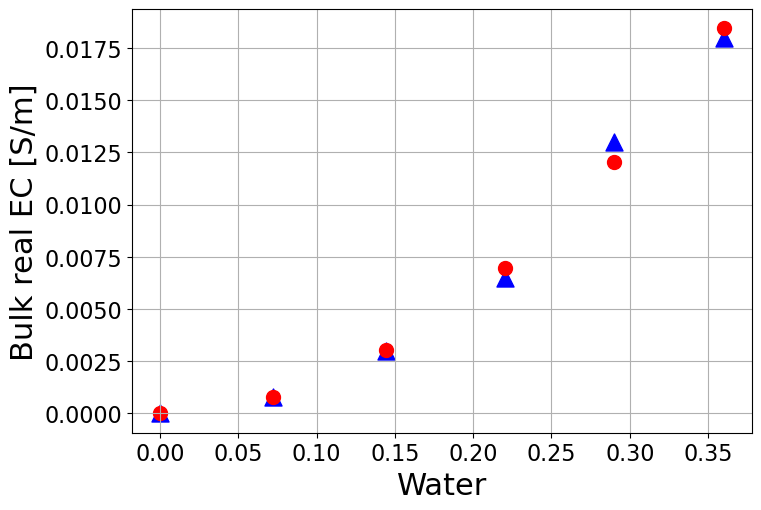

In [6]:
sampleDR_S.info.to_excel('sampleDR_S_info.xlsx')
sampleDR_S.df.to_excel('sampleDR_S_df.xlsx')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sampleDR_S.df.water, sampleDR_S.df.bulk_ec, marker = "^", color='blue', alpha=1, s=ss)
ax.scatter(sampleDR_S.df.water, Rhoades(sampleDR_S.df.water, sampleDR_S.df.water_ec, sampleDR_S.df.s_ec, sampleDR_S.E, sampleDR_S.F), color='red', alpha=1, s=100)

fig.set_figheight(5.5)
fig.set_figwidth(8)

#ax.set_ylim(0, 25)
#ax.set_xlim(0, 65e-3)
ax.grid(True)
ax.set_xlabel('Water', fontsize = 22)
ax.set_ylabel('Bulk real EC [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('ExDR_S')
plt.show()

In [7]:
print("################## Example0 ####################")     
                         #   0     1    2     3       4       5       6       7
sample0 = Soil( water =     [0.05, 0.1, 0.08, 0.14,   0.04,   np.nan, np.nan, 0.07], 
                bulk_perm = [6,    11,  9,    np.nan, np.nan, np.nan, 8,      8.5 ], 
                bulk_density=1.7,
                solid_perm = 5,
                instrument = 'TDR')
print(sample0.df)
print("predict.BulkPerm(sample0) :", predict.BulkPerm(sample0)) 
print("predict.BulkPerm(sample0) :", predict.BulkPerm(sample0))

sample0.info.to_excel('sample0_info.xlsx')
sample0.df.to_excel('sample0_df.xlsx')

################## Example0 ####################
   temperature  water  salinity  sand  silt  clay  bulk_density  \
0          NaN   0.05       NaN   NaN   NaN   NaN           1.7   
1          NaN   0.10       NaN   NaN   NaN   NaN           1.7   
2          NaN   0.08       NaN   NaN   NaN   NaN           1.7   
3          NaN   0.14       NaN   NaN   NaN   NaN           1.7   
4          NaN   0.04       NaN   NaN   NaN   NaN           1.7   
5          NaN    NaN       NaN   NaN   NaN   NaN           1.7   
6          NaN    NaN       NaN   NaN   NaN   NaN           1.7   
7          NaN   0.07       NaN   NaN   NaN   NaN           1.7   

   particle_density  CEC  OC  ...  solid_perm  offset_perm  bulk_ec  water_ec  \
0               NaN  NaN NaN  ...           5          NaN      NaN       NaN   
1               NaN  NaN NaN  ...           5          NaN      NaN       NaN   
2               NaN  NaN NaN  ...           5          NaN      NaN       NaN   
3               NaN  Na

In [8]:
sample1 = Soil( water = [0.1, 0.15, 0.2, 0.25, 0.30, 0.40],
                bulk_density = 1.5) 


sample0.water [0.1  0.2  0.25 0.3  0.4 ]
sample0.df    temperature  water  salinity  sand  silt  clay  bulk_density  \
0       298.15   0.10       NaN   NaN   NaN    10           1.4   
1       298.15   0.20       NaN   NaN   NaN    10           1.4   
2       298.15   0.25       NaN   NaN   NaN    10           1.4   
3       298.15   0.30       NaN   NaN   NaN    10           1.4   
4       298.15   0.40       NaN   NaN   NaN    10           1.4   

   particle_density  CEC  OC  ...  solid_perm  offset_perm   bulk_ec  \
0              2.65  NaN NaN  ...         NaN          NaN  0.009290   
1              2.65  NaN NaN  ...         NaN          NaN  0.028581   
2              2.65  NaN NaN  ...         NaN          NaN  0.041976   
3              2.65  NaN NaN  ...         NaN          NaN  0.057871   
4              2.65  NaN NaN  ...         NaN          NaN  0.097161   

   water_ec  solid_ec  dry_ec  sat_ec  s_ec  frequency_perm  frequency_ec  
0       0.5         0     NaN     Na

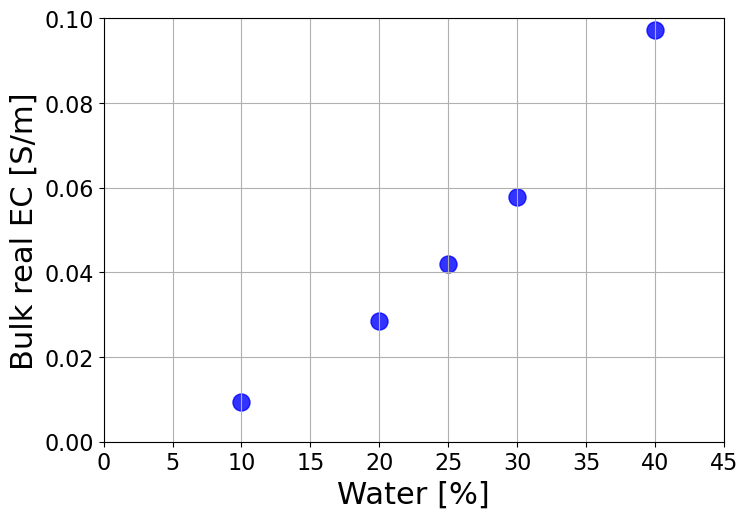

In [9]:
ss = 150
sample0 = Soil( water = [0.1, 0.2, 0.25, 0.30, 0.40],
                clay = 10,
                bulk_density = 1.4,
                water_ec = 0.5)

print('sample0.water', sample0.water)

sample0_ec = predict.BulkEC(sample0)
 
print('sample0.df', sample0.df)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.scatter(sample0.water*100, sample0_ec, color='blue', alpha=0.8, s=ss)

ax.set_ylim(0, 0.1)
ax.set_xlim(0, 45)
ax.set_ylabel('Bulk real EC [S/m]', fontsize = 22)
ax.set_xlabel('Water [%]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.grid(True)  


plt.savefig('Ex0')
plt.show()

bulk_ec_dc 0    0.010
1    0.020
2    0.025
3    0.030
4    0.040
Name: bulk_ec, dtype: float64
sample1.df    temperature  water  salinity  sand  silt  clay  bulk_density  \
0       298.15  0.105       NaN   NaN   NaN    10           1.4   
1       298.15  0.162       NaN   NaN   NaN    10           1.4   
2       298.15  0.185       NaN   NaN   NaN    10           1.4   
3       298.15  0.206       NaN   NaN   NaN    10           1.4   
4       298.15  0.243       NaN   NaN   NaN    10           1.4   

   particle_density  CEC  OC  ...  solid_perm  offset_perm  bulk_ec  water_ec  \
0              2.65  NaN NaN  ...         NaN          NaN    0.010       0.5   
1              2.65  NaN NaN  ...         NaN          NaN    0.020       0.5   
2              2.65  NaN NaN  ...         NaN          NaN    0.025       0.5   
3              2.65  NaN NaN  ...         NaN          NaN    0.030       0.5   
4              2.65  NaN NaN  ...         NaN          NaN    0.040       0.5   

   

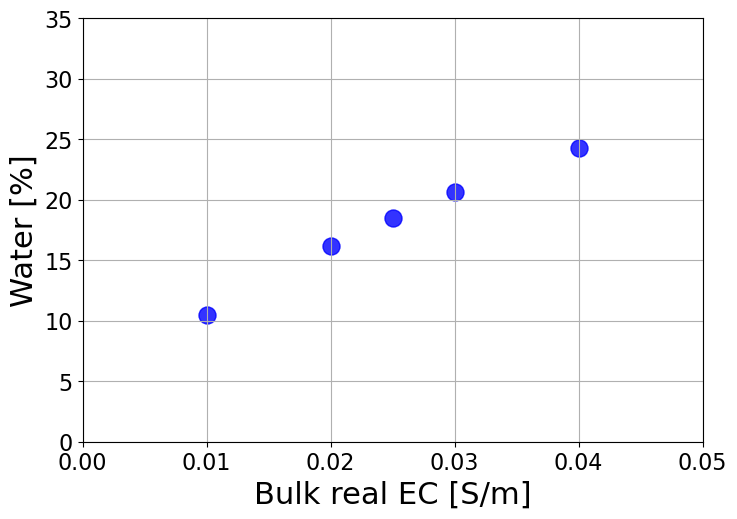

In [10]:
ss = 150
sample1 = Soil( bulk_ec = [0.01, 0.02, 0.025, 0.030, 0.040],
                clay = 10,
                bulk_density = 1.4,
                water_ec = 0.5)

predict.Water(sample1) 

print('sample1.df', sample1.df)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.scatter(sample1.bulk_ec, sample1.df.water*100, color='blue', alpha=0.8, s=ss)

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('Bulk real EC [S/m]', fontsize = 22)
ax.set_ylabel('Water [%]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.grid(True)  


plt.savefig('Ex1')
plt.show()

sample1b    temperature  water  salinity  sand  silt  clay  bulk_density  \
0          NaN    NaN       NaN   NaN   NaN    11           1.4   
1          NaN    NaN       NaN   NaN   NaN     8           1.4   
2          NaN    NaN       NaN   NaN   NaN    12           1.4   
3          NaN    NaN       NaN   NaN   NaN    15           1.4   
4          NaN    NaN       NaN   NaN   NaN     7           1.4   

   particle_density  CEC  OC  ...  solid_perm  offset_perm  bulk_ec  water_ec  \
0               NaN  NaN NaN  ...         NaN          NaN    0.010       0.5   
1               NaN  NaN NaN  ...         NaN          NaN    0.020       0.5   
2               NaN  NaN NaN  ...         NaN          NaN    0.025       0.5   
3               NaN  NaN NaN  ...         NaN          NaN    0.030       0.5   
4               NaN  NaN NaN  ...         NaN          NaN    0.040       0.5   

   solid_ec  dry_ec  sat_ec  s_ec  frequency_perm  frequency_ec  
0       NaN     NaN     NaN   NaN  

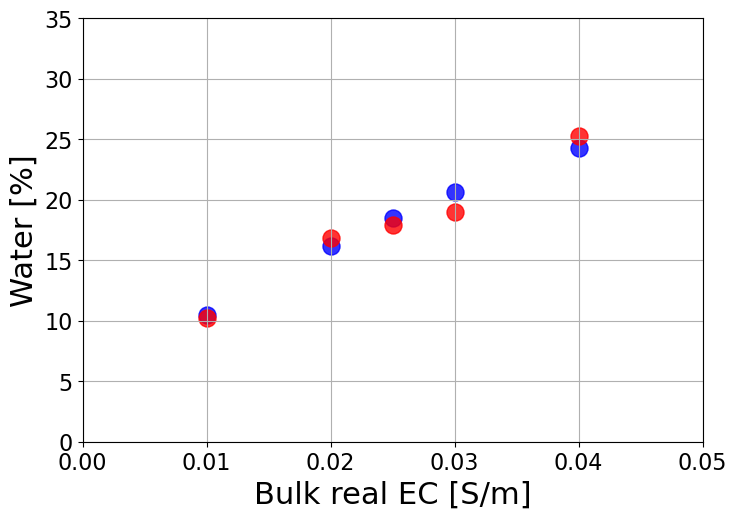

In [11]:
ss = 150
sample1b = Soil( bulk_ec = [0.01, 0.02, 0.025, 0.030, 0.040],
                clay = [11, 8, 12, 15, 7],
                bulk_density = 1.4,
                water_ec = 0.5)

print('sample1b', sample1b)

predict.Water(sample1b) 

print('sample1b', sample1b)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.scatter(sample1.bulk_ec, sample1.df.water*100, color='blue', alpha=0.8, s=ss)
ax.scatter(sample1b.bulk_ec, sample1b.df.water*100, color='red', alpha=0.8, s=ss)

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('Bulk real EC [S/m]', fontsize = 22)
ax.set_ylabel('Water [%]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.grid(True)  


plt.savefig('Ex1b')
plt.show()

sample5    temperature  water  salinity  sand  silt  clay  bulk_density  \
0          NaN   0.30       NaN   NaN   NaN   NaN           1.5   
1          NaN   0.10       NaN   NaN   NaN   NaN           1.5   
2          NaN   0.15       NaN   NaN   NaN   NaN           1.5   
3          NaN   0.23       NaN   NaN   NaN   NaN           1.5   
4          NaN   0.02       NaN   NaN   NaN   NaN           1.5   

   particle_density  CEC  OC  ...  solid_perm  offset_perm  bulk_ec  water_ec  \
0               NaN  NaN NaN  ...         NaN          NaN      NaN       NaN   
1               NaN  NaN NaN  ...         NaN          NaN      NaN       NaN   
2               NaN  NaN NaN  ...         NaN          NaN      NaN       NaN   
3               NaN  NaN NaN  ...         NaN          NaN      NaN       NaN   
4               NaN  NaN NaN  ...         NaN          NaN      NaN       NaN   

   solid_ec  dry_ec  sat_ec  s_ec  frequency_perm  frequency_ec  
0       NaN     NaN     NaN   NaN   

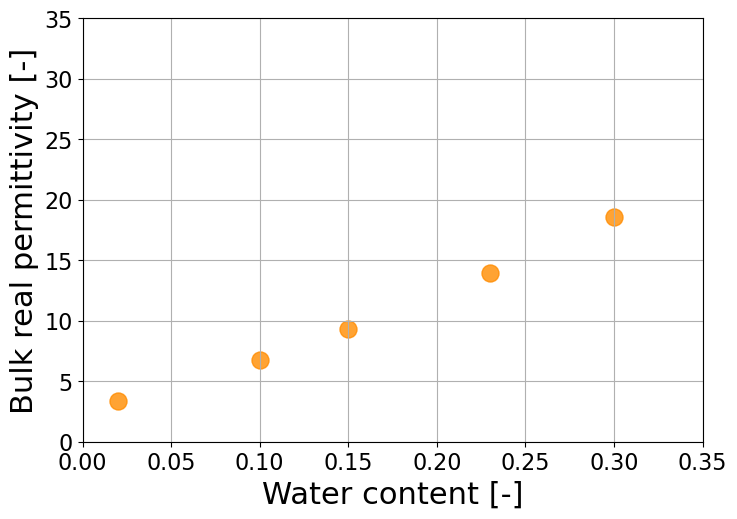

In [12]:
ss = 150

sample5 = Soil( water = [0.3, 0.1, 0.15, 0.23, 0.02],
                bulk_density = 1.5,
                texture = 'Silt loam',
                instrument = 'GPR')

print('sample5', sample5)

predict.BulkPerm(sample5) 

print('sample5', sample5)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(sample5.water, sample5.df.bulk_perm, marker='o', color='darkorange', alpha=0.8, s=ss)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_xlim(0, 0.35)
ax.set_ylim(0, 35)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_xlabel('Water content [-]', fontsize = 22) 
ax.set_ylabel('Bulk real permittivity [-]', fontsize = 22) 
ax.grid(True)  
#ax.legend(loc='upper right', fontsize = 20)


plt.savefig('Ex5')
plt.show()

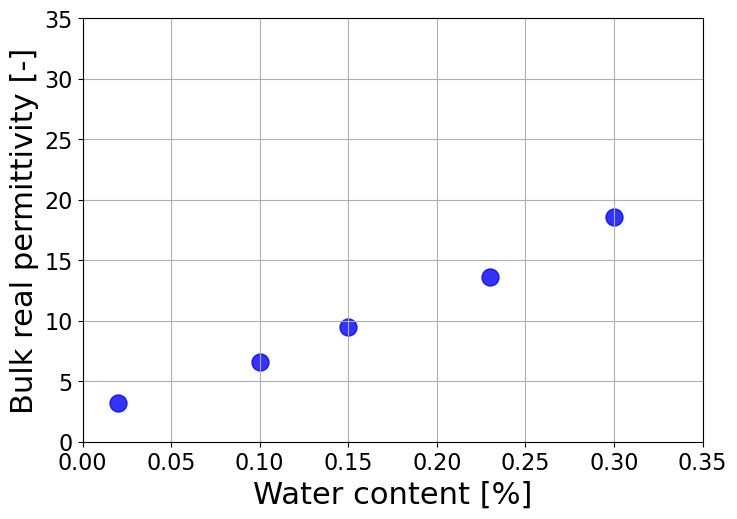

[nan nan nan nan nan]
0    80
1    80
2    80
3    80
4    80
Name: water_perm, dtype: int64


In [13]:
sample5b = Soil( water = [0.3, 0.1, 0.15, 0.23, 0.02],
                 bulk_density = [1.5, 1.35, 1.6, 1.33, 1.4],
                 temperature = 15+273.15,
                 texture = 'Silt loam',
                 instrument = 'GPR')

predict.BulkPerm(sample5b) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

s=150 
ax.scatter(sample1.water, sample1.df.bulk_perm, color='darkorange', alpha=0.8, s=ss)
ax.scatter(sample5b.water, sample5b.df.bulk_perm, color='blue', alpha=0.8, s=ss)

fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_xlim(0, 0.35)
ax.set_ylim(0, 35)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_xlabel('Water content [%]', fontsize = 22) 
ax.set_ylabel('Bulk real permittivity [-]', fontsize = 22) 
ax.grid(True)  

plt.savefig('Ex5b')
plt.show()

print(sample5b.water_perm)
print(sample5b.df.water_perm)

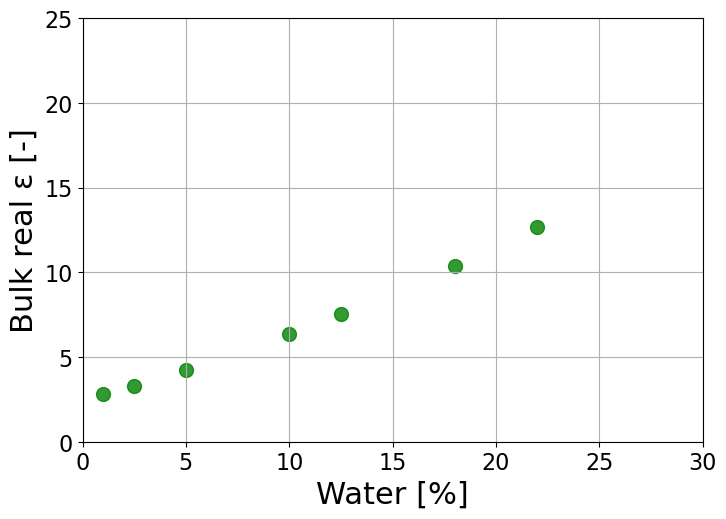

In [14]:
sample2 = Soil( water = [0.01, 0.1, 0.125, 0.025, 0.05, 0.18, 0.22],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15+273.15,
                instrument = 'GPR')

predict.BulkPerm(sample2) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(8)
ss=100
ax.scatter(sample2.water*100, sample2.df.bulk_perm, color='green', alpha=0.8, s=ss)
ax.set_xlim(0, 30)
ax.set_ylim(0, 25)
ax.set_xlabel('Water [%]', fontsize = 22)
ax.set_ylabel('Bulk real ε [-]', fontsize = 22)
ax.grid(True)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 


plt.savefig('Ex2')
plt.show()

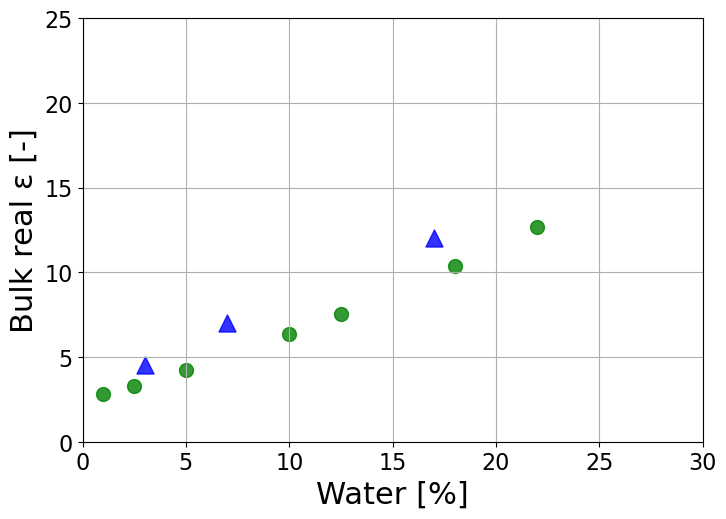

sample2b.df.bulk_perm 0    12.000
1     4.500
2     7.000
3     3.669
4     8.003
5     9.434
6     4.284
7     5.413
8    12.829
9    15.468
Name: bulk_perm, dtype: float64


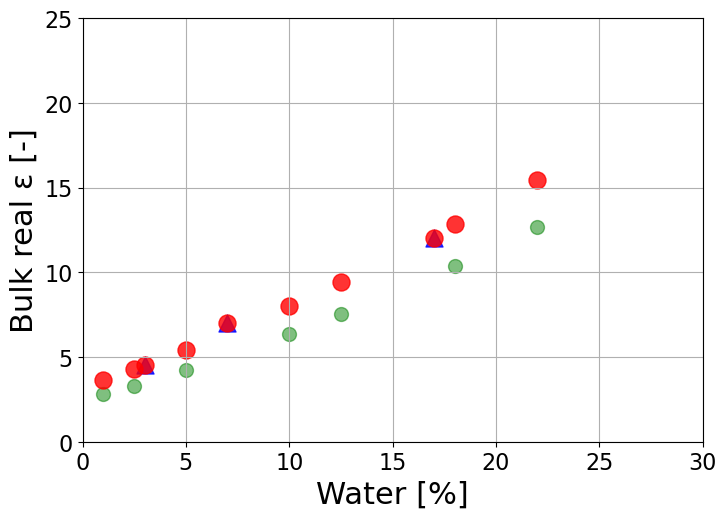

In [15]:
sample2b = Soil(water = [0.17, 0.03, 0.07, 0.01, 0.1, 
                         0.125, 0.025, 0.05, 0.18, 0.22],
                bulk_perm = [12, 4.5, 7],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15+273.15,
                instrument = 'GPR')

predict.BulkPerm(sample2b) 
ss= 150
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.scatter(sample2.water*100, sample2.df.bulk_perm, color='green', alpha=0.8, s=100)
ax.scatter(sample2b.water*100, sample2b.bulk_perm, color='blue', marker ="^", alpha=0.8, s=ss)

ax.set_xlim(0, 30)
ax.set_ylim(0, 25)
ax.set_xlabel('Water [%]', fontsize = 22)
ax.set_ylabel('Bulk real ε [-]', fontsize = 22)
ax.grid(True)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('Ex2_cal')
plt.show()

###################################################################################################
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
fig2.set_figheight(5.5)
fig2.set_figwidth(8)

ax2.scatter(sample2.water*100, sample2.df.bulk_perm, color='green', alpha=0.5, s=100)
ax2.scatter(sample2b.water*100, sample2b.bulk_perm, color='blue', marker ="^", alpha=0.8, s=ss)
ax2.scatter(sample2b.df.water*100, sample2b.df.bulk_perm, color='red', alpha=0.8, s=ss)

print('sample2b.df.bulk_perm', sample2b.df.bulk_perm)

ax2.set_xlim(0, 30)
ax2.set_ylim(0, 25)
ax2.set_xlabel('Water [%]', fontsize = 22)
ax2.set_ylabel('Bulk real ε [-]', fontsize = 22)
ax2.grid(True)
ax2.tick_params(axis='y', labelsize=16) 
ax2.tick_params(axis='x', labelsize=16) 

plt.savefig('Ex2_pred')
plt.show()


Water perm changing freq
bulk_ec [1e-05, 0.0003, 0.00191, 0.00784, 6e-05, 0.00161, 0.01012, 0.04156]
soil.df.bulk_ec 0    0.00001
1    0.00030
2    0.00191
3    0.00784
4    0.00006
5    0.00161
6    0.01012
7    0.04156
Name: bulk_ec, dtype: float64
soil.df.frequency_ec 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: frequency_ec, dtype: int64
bulk_ec_dc 0    0.00001
1    0.00030
2    0.00191
3    0.00784
4    0.00006
5    0.00161
6    0.01012
7    0.04156
Name: bulk_ec, dtype: float64


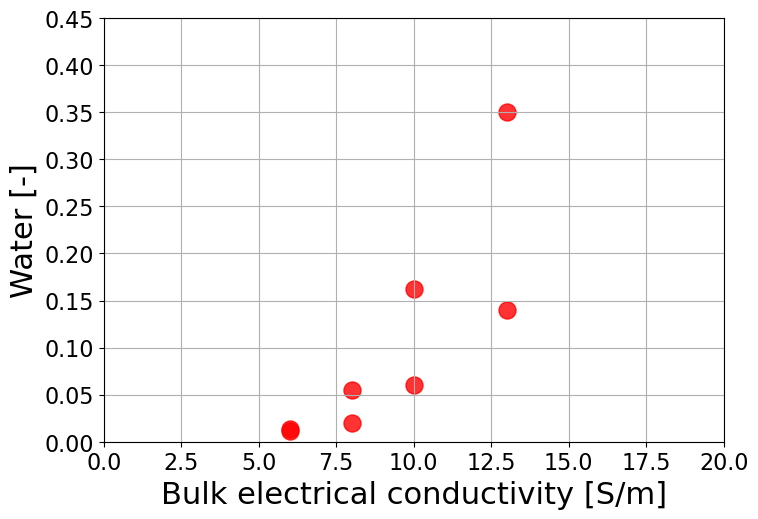

In [16]:
sample4 = Soil( bulk_perm = [6, 8, 10, 13, 6, 8, 10, 13],
                frequency_perm = [50e6, 50e6, 50e6, 50e6, 200e6, 200e6, 200e6, 200e6],
                texture = 'Sand',
                bulk_density= 1.5,
                water_ec = 0.3)

predict.Water(sample4) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample4.bulk_perm[0:4], sample4.df.water[0:4], color='red', alpha=0.8, s=ss)
ax.scatter(sample4.bulk_perm[4:], sample4.df.water[4:], color='red', alpha=0.8, s=ss)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_xlim(0, 20)
ax.set_ylim(0, 0.45)
ax.grid(True)
ax.set_ylabel('Water [-]', fontsize = 22)
ax.set_xlabel('Bulk electrical conductivity [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 


plt.savefig('Ex4')
plt.show()


bulk_ec_dc [0.00858 0.01198 0.00472 0.00762 0.00092 0.00744 0.01067 0.00379 0.00515
 0.00158]


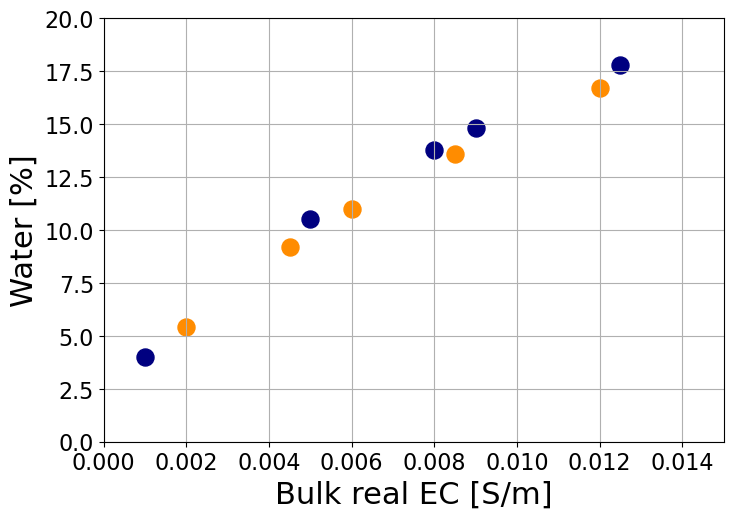

In [17]:
sample3 = Soil( bulk_ec = [0.009, 0.0125, 0.005, 0.008, 0.001, 
                             0.0085, 0.012, 0.0045, 0.006, 0.002],
                frequency_ec = [80, 80, 80, 80, 80, 
                                  50e3, 50e3, 50e3, 50e3, 50e3],
                texture = 'Sand',
                bulk_density= 1.5,
                water_ec = 0.3)

predict.Water(sample3) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample3.bulk_ec[:5], sample3.df.water[:5]*100, color='navy', alpha=1, s=ss)
ax.scatter(sample3.bulk_ec[5:], sample3.df.water[5:]*100, color='darkorange', alpha=1, s=ss)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_ylim(0, 20)
ax.set_xlim(0, 15e-3)
ax.grid(True)
ax.set_ylabel('Water [%]', fontsize = 22)
ax.set_xlabel('Bulk real EC [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('Ex3')
plt.show()

In [18]:
sample1a = Soil( bulk_ec = [ 0.002, 0.002 ] ,
                frequency_ec = [ 80, 80, 50e3],
                water = [0.2],
                texture = 'Sand',
                bulk_density= 1.5,
                water_ec = 0.3)

predict.BulkEC(sample1a) 
sample1a.df.bulk_ec

0    0.002151
1    0.002151
2    0.016408
Name: bulk_ec, dtype: float64

In [19]:
sample1b = Soil( bulk_perm = [ 15, 15 ] ,
                frequency_perm = [ 50e6, 50e6, 50e8],
                texture = 'Sand',
                water = 0.1,
                bulk_density= 1.5,
                water_ec = 0.3)

predict.BulkPerm(sample1b) 
sample1b.df.bulk_perm

0    15.000
1    15.000
2     6.177
Name: bulk_perm, dtype: float64

In [20]:
print("################## Example1b ####################") 
                         #          0     1     2     3       4     5      6      7      8     9      10
sample1bWEC = Soil( bulk_ec=np.array(  [10,   15,   20,   25,     7,    1,     12,    22,    5,    20,    30   ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
            water_ec = np.array( [ 0.05, 0.06, 0.07, np.nan, 0.01, 0.1]))

water1b = predict.Water(sample1bWEC) #         [0.348 0.414 0.46    nan   0.444 0.058   nan   nan   nan   nan   nan] 
print("water1b", water1b) #         

sample1bWEC.info
#Despite several nans in the prediction of water, the info gives the same information about the modelling of states where there are nans and 
#results. How can I check why this is a nan? the info mentiones the function Fu. 
# So in the graph of the paper we follow that function predict.water.water_from_ec.non_fitting and check the needed arguments.

################## Example1b ####################
bulk_ec_dc 0     0.010
1     0.015
2     0.020
3     0.025
4     0.007
5     0.001
6     0.012
7     0.022
8     0.005
9     0.020
10    0.030
Name: bulk_ec, dtype: float64
water1b [0.35  0.413 0.459   nan 0.442 0.065   nan   nan   nan   nan   nan]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,OC,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
1,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
2,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
3,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,NaN,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
6,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,NaN,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
7,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,NaN,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
8,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by

In [21]:
print("################## Example4 ####################")     
                         #                      0     1     2     3       4       5       6       7
sample4WEC = Soil(water =                      [0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07], 
                            bulk_ec=np.array(  [6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5 ])*1e-3, 
                            water_ec = 0.05)

water4 = predict.Water(sample4WEC) #                   [0.05  0.11  0.08  0.11    nan     nan     0.067   0.07 ]
print('water4', water4) #                     

sample4WEC.info
# Aca el estado 4 y 5 uestra dos modelados. Esto es pq el output del primero (fitting) es un nan. Entonces se llama 
#a Fu, donde solo uno puede ser resuelto. Entonces los resultados del df corresponden al ultimo modelado que el info menciona

################## Example4 ####################
bulk_ec_dc 0    0.0060
1    0.0110
2    0.0090
3       NaN
4    0.0010
5       NaN
6    0.0080
7    0.0085
Name: bulk_ec, dtype: float64
water EC fitting
bulk_ec_dc 0    0.0060
1    0.0110
2    0.0090
3       NaN
4    0.0010
5       NaN
6    0.0080
7    0.0085
Name: bulk_ec, dtype: float64
soil.df.frequency_ec 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: frequency_ec, dtype: int64
water4 [0.05  0.11  0.08  0.11    nan   nan 0.067 0.07 ]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,OC,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
1,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
2,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
3,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.993) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.013]",NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
7,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default


In [22]:
print("################## Example5 ####################")
                         #                     0     1     2     3     4     5     6      7    8     9      10
sample5WEC = Soil( bulk_ec=np.array([          10,   15,   20,   25,   7,    1,    12,    20,  5,    20,    22 ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
                            water_ec = 0.01,
                      frequency_ec = 500)

water5 = predict.Water(sample5WEC) #           [0.557 0.65  0.65  0.65  0.421 0.074 0.639 0.65  0.32  0.65  0.65 ]
print("water5", water5) #                      [0.566 0.65  0.65  0.65  0.421 0.15  0.639 0.65  0.316 0.65  0.65 ] 16/8 !?
#                                   
sample5WEC.info

################## Example5 ####################
bulk_ec_dc [0.00942 0.01421 0.01902 0.02385 0.00655 0.00089 0.01133 0.01902 0.00465
 0.01902 0.02096]
water5 [0.566 0.65  0.65  0.65  0.421 0.15  0.639 0.65  0.316 0.65  0.65 ]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,OC,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by defau

In [23]:
print("################## Example6 ####################")     
                         #                      0     1     2     3     4     5     6     7     8     9     10
sample6WEC = Soil(water =          [            0.20, 0.30, 0.35                                                 ], 
                            bulk_ec=np.array([  10,   15,   20,   8.5,  8,    1,    12,   22,   5,    20,   30   ])*1e-3, 
                            bulk_density=1.7,
                            clay = 40,
                            water_ec=0.4,
                            frequency_ec=5e3)

water6 = predict.Water(sample6WEC) #                   [0.2   0.3   0.35  0.162 0.148 0.005 0.241 0.374 0.033 0.354 0.131]
print("water6", water6) #                         
print("sample6WEC.Lw", sample6WEC.Lw) #                         

sample6WEC.info

################## Example6 ####################
bulk_ec_dc [0.0092  0.01392 0.01866 0.00779 0.00732 0.00085 0.01108 0.02056 0.00451
 0.01866 0.02819]
water EC fitting
bulk_ec_dc [0.0092  0.01392 0.01866 0.00779 0.00732 0.00085 0.01108 0.02056 0.00451
 0.01866 0.02819]
soil.df.frequency_ec 0     5000.0
1     5000.0
2     5000.0
3     5000.0
4     5000.0
5     5000.0
6     5000.0
7     5000.0
8     5000.0
9     5000.0
10    5000.0
Name: frequency_ec, dtype: float64
water6 [0.2   0.3   0.35  0.162 0.148 0.005 0.241 0.374 0.033 0.354 0.131]
sample6WEC.Lw 0.2008264330151126


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,OC,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.992) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.992) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.992) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.992) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
8,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.992) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values bet

In [24]:
print("################## Example7 ####################")
                        #                      0     1     2     3       4       5       6       7     8       9
sample7WEC = Soil(water =          [           0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07, np.nan, np.nan], 
                            bulk_ec =np.array([6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5,  8.5,    8.5 ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
                            solid_perm = 5,
                            water_ec = 0.05,
                    frequency_ec = [           50e1, 50e2, 50e2, 200e2,  200e2,  200e2,  50e2,   50e1, 50e1,   200e2] )

# bulk_ec_dc [0.0056  0.01014 0.00826     nan 0.00078     nan 0.00732 0.00798 0.00798  0.0076 ]

water7 = predict.Water(sample7WEC)  #                
print('water7', water7) #                     [0.05  0.11  0.08  0.11    0.071   nan     0.028   0.07  0.028   0.028]
#                                             [0.05  0.11  0.08  0.11    0.071   nan     0.067   0.07  0.073   0.073]
sample7WEC.info

################## Example7 ####################
bulk_ec_dc [0.0056  0.01014 0.00826     nan 0.00078     nan 0.00732 0.00798 0.00798
 0.0076 ]
water EC fitting
bulk_ec_dc [0.0056  0.01014 0.00826     nan 0.00078     nan 0.00732 0.00798 0.00798
 0.0076 ]
soil.df.frequency_ec 0      500.0
1     5000.0
2     5000.0
3    20000.0
4    20000.0
5    20000.0
6     5000.0
7      500.0
8      500.0
9    20000.0
Name: frequency_ec, dtype: float64
water7 [0.05  0.11  0.08  0.11  0.071   nan 0.028 0.07  0.028 0.028]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,OC,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=-0.204) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.003, 0.012]",NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_

In [25]:
print("################## Example7b ####################")
                        #                       0     1     2     3       4       5       6       7     8       9
sample7bWEC = Soil(water =                     [0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07, np.nan, np.nan], 
                            bulk_ec=np.array([  6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5,  8.5,    8.5   ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
                            solid_perm = 5,
                            water_ec = 0.05,
                    frequency_ec =             [50,   5,   50,    200e2,  200e2,  200e2,  50e2,   50e1, 50,     20    ])

water7b = predict.Water(sample7bWEC)                  
print('water7b', water7b) #                    [0.05  0.11  0.08  0.11    0.056   nan     0.061   0.07  0.075   0.075]
                             #                 [0.05  0.11  0.08  0.11    0.071   nan     0.      0.07  0.073   0.073]
                             #                 [0.05  0.11  0.08  0.11    0.071   nan     0.067   0.07  0.073   0.073]
sample7bWEC.info

################## Example7b ####################
bulk_ec_dc [0.00571 0.011   0.00862     nan 0.00078     nan 0.00732 0.00798 0.00813
 0.00818]
water EC fitting
bulk_ec_dc [0.00571 0.011   0.00862     nan 0.00078     nan 0.00732 0.00798 0.00813
 0.00818]
soil.df.frequency_ec 0       50.0
1        5.0
2       50.0
3    20000.0
4    20000.0
5    20000.0
6     5000.0
7      500.0
8       50.0
9       20.0
Name: frequency_ec, dtype: float64
water7b [0.05  0.11  0.08  0.11  0.071   nan 0.063 0.07  0.072 0.073]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,OC,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=0.996) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.003, 0.014]",NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift done using LongmireSmithEC function in predict.water.water_from_ec.non_dc_freq_to_dc_freq,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
8,Set

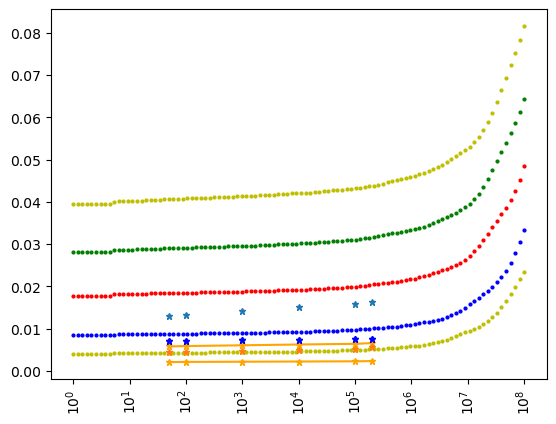

In [38]:
sample11g = Soil(water = [0.1], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample12g = Soil(water = [0.2], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample13g = Soil(water = [0.3], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample14g = Soil(water = [0.4], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample15g = Soil(water = [0.05], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)

LS1 = predict.BulkEC(sample11g)
LS2 = predict.BulkEC(sample12g)
LS3 = predict.BulkEC(sample13g)
LS4 = predict.BulkEC(sample14g)
LS5 = predict.BulkEC(sample15g)

#LS1 = LongmireSmithEC([0.01], np.logspace(0, 9, 100) )
#LS2 = LongmireSmithEC([0.02], np.logspace(0, 9, 100) )
#LS3 = LongmireSmithEC([0.03], np.logspace(0, 9, 100) )
#LS4 = LongmireSmithEC([0.04], np.logspace(0, 9, 100) )
#LS5 = LongmireSmithEC([0.05], np.logspace(0, 9, 100) )

plt.semilogx(np.logspace(0, 8, 100), LS1, 'bo', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS2, 'ro', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS3, 'go', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS4, 'yo', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS5, 'yo', markersize=2)

#plt.semilogx(np.logspace(0, 9, 100), LS5, 'o',  markersize=2)
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/77, 1/75, 1/70, 1/66, 1/63, 1/61], '*', markersize=5) #Fig 3a zhou15 clay Loam
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3a zhou15 silty sand
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/173, 1/170, 1/165, 1/160, 1/156, 1/152], color= 'orange', marker='*', markersize=5)#Fig 3a zhou15 sandy

plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3b zhou15 silty sand
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/480, 1/470, 1/460, 1/450, 1/440, 1/430], color= 'orange', marker='*', markersize=5)#Fig 3b zhou15 sandy
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/225, 1/220, 1/210, 1/200, 1/190, 1/180], '*', markersize=5) #Fig 3b zhou15 clay Loam

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.logspace(0, 8, 9), rotation='vertical')  # Set label locations.

plt.show()

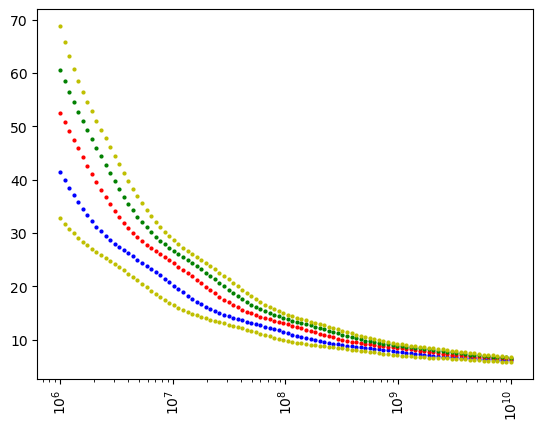

In [47]:
sample11g = Soil(water = [0.1], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample12g = Soil(water = [0.2], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample13g = Soil(water = [0.3], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample14g = Soil(water = [0.4], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample15g = Soil(water = [0.05], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)

LS1 = predict.BulkPerm(sample11g)
LS2 = predict.BulkPerm(sample12g)
LS3 = predict.BulkPerm(sample13g)
LS4 = predict.BulkPerm(sample14g)
LS5 = predict.BulkPerm(sample15g)

#LS1 = LongmireSmithEC([0.01], np.logspace(0, 9, 100) )
#LS2 = LongmireSmithEC([0.02], np.logspace(0, 9, 100) )
#LS3 = LongmireSmithEC([0.03], np.logspace(0, 9, 100) )
#LS4 = LongmireSmithEC([0.04], np.logspace(0, 9, 100) )
#LS5 = LongmireSmithEC([0.05], np.logspace(0, 9, 100) )

plt.semilogx(np.logspace(6, 10, 100), LS1, 'bo', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS2, 'ro', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS3, 'go', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS4, 'yo', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS5, 'yo', markersize=2)

#plt.semilogx(np.logspace(0, 9, 100), LS5, 'o',  markersize=2)
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/77, 1/75, 1/70, 1/66, 1/63, 1/61], '*', markersize=5) #Fig 3a zhou15 clay Loam
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3a zhou15 silty sand
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/173, 1/170, 1/165, 1/160, 1/156, 1/152], color= 'orange', marker='*', markersize=5)#Fig 3a zhou15 sandy

#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3b zhou15 silty sand
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/480, 1/470, 1/460, 1/450, 1/440, 1/430], color= 'orange', marker='*', markersize=5)#Fig 3b zhou15 sandy
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/225, 1/220, 1/210, 1/200, 1/190, 1/180], '*', markersize=5) #Fig 3b zhou15 clay Loam

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.logspace(6, 10, 5), rotation='vertical')  # Set label locations.

plt.show()